In [2]:

!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
import warnings
warnings.filterwarnings('ignore')

E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmdb3 libmdbsql3
Suggested packages:
  bash-completion
The following NEW packages will be installed:
  libmdb3 libmdbsql3 mdbtools
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 136 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdb3 amd64 1.0.0+dfsg-1 [68.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdbsql3 amd64 1.0.0+dfsg-1 [18.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mdbtools amd64 1.0.0+dfsg-1 [48.3 kB]
Fetched 136 kB in 0s (284 kB/s)
Selecting previously unselected package 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

In [5]:

# 使用例
table_name = 'HistoryVariables'  # テーブル名を指定

file_list = [f'kjdb_prediction_cache_{year}.accdb' for year in range(2000, 2025)]
years = range(2000, 2025)

k_a_util.prepare_pd_on_notebook()
print(len(file_list))

dict_statistics={}
for y in years:
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  columns_to_drop = [ 'key_program_id','key_horse_id','desc_race_no', 'desc_horse_no', 'upd']
  df = df_summary.drop(columns=columns_to_drop)
  dict_statistics[y] = df

25


In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt

# def plot_histograms(dict_statistics, rows, cols, dpi=80):
#     """
#     指定された辞書の各DataFrameのヒストグラムをプロットする関数です。

#     Args:
#         dict_statistics: プロット対象のDataFrameを含む辞書。
#         rows: グラフの行数。
#         cols: グラフの列数。
#         dpi: グラフの解像度。

#     Returns:
#         None
#     """
#     plt.subplots_adjust(wspace=0.4, hspace=1.0)
#     for year, df in dict_statistics.items():
#         print(f"{year}")
#         # グラフのサイズを指定
#         fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4, rows*3), dpi=dpi)

#         # 各列のヒストグラムをプロット
#         for i, column in enumerate(df.columns):
#             ax = axes[i // cols, i % cols]
#             df[column].hist(ax=ax, bins=20)  # ヒストグラムのビンの数を調整可能
#             ax.set_title(column)

#         # グラフのレイアウト調整
#         #plt.tight_layout()
#         plt.suptitle(f"Histograms for Year {year}", fontsize=14)

#         # グラフの保存 (必要に応じて)
#         # plt.savefig(f"histograms_{year}.png")
#         plt.show()



2000


<Figure size 640x480 with 0 Axes>

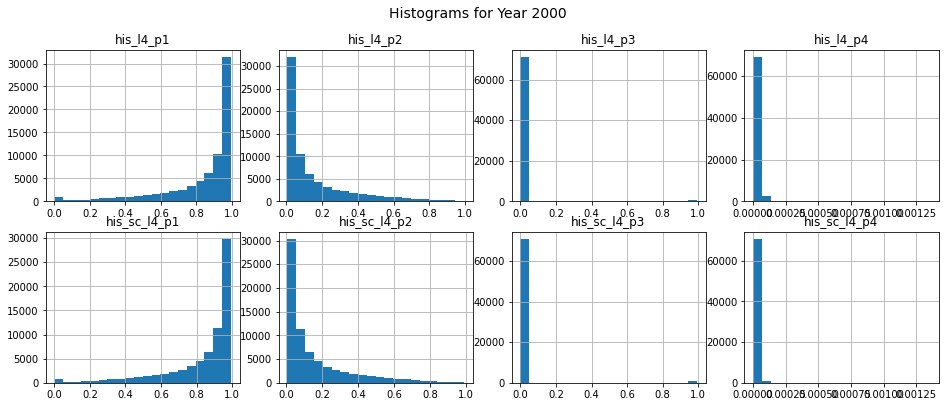

2001


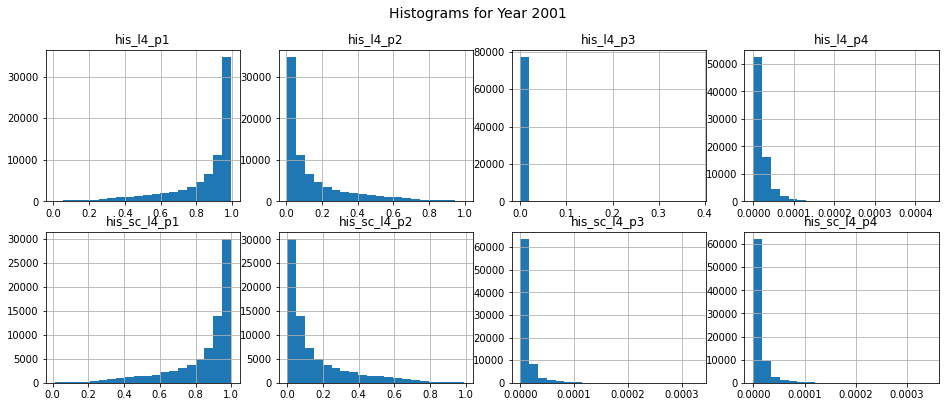

2002


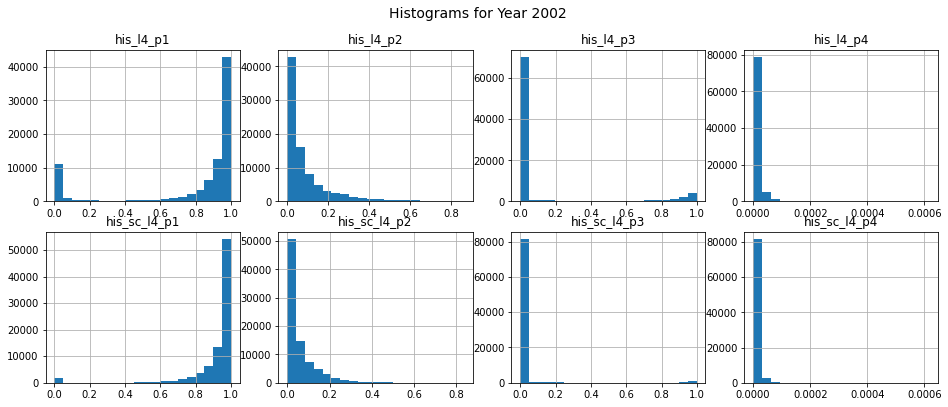

2003


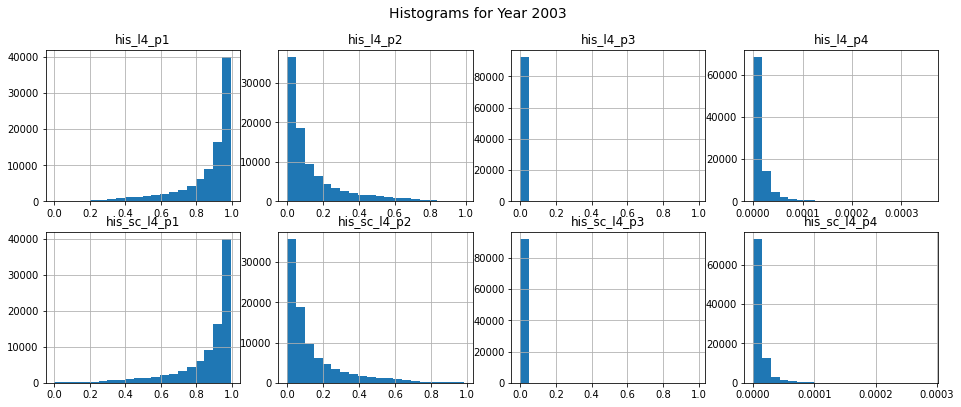

2004


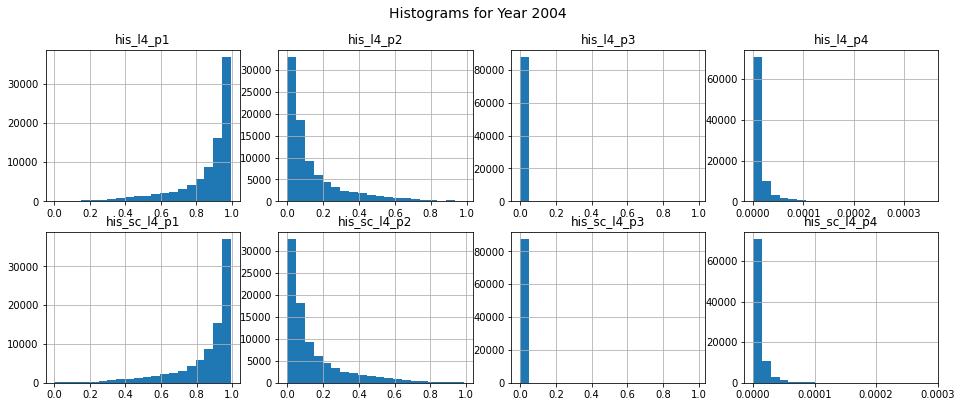

2005


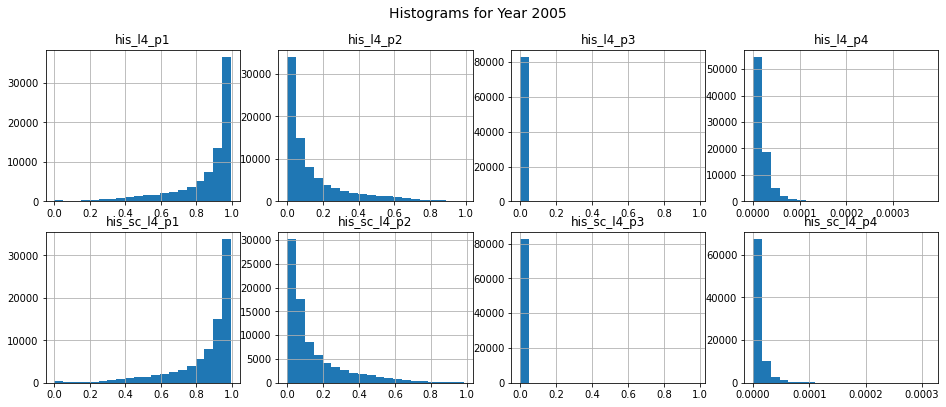

2006


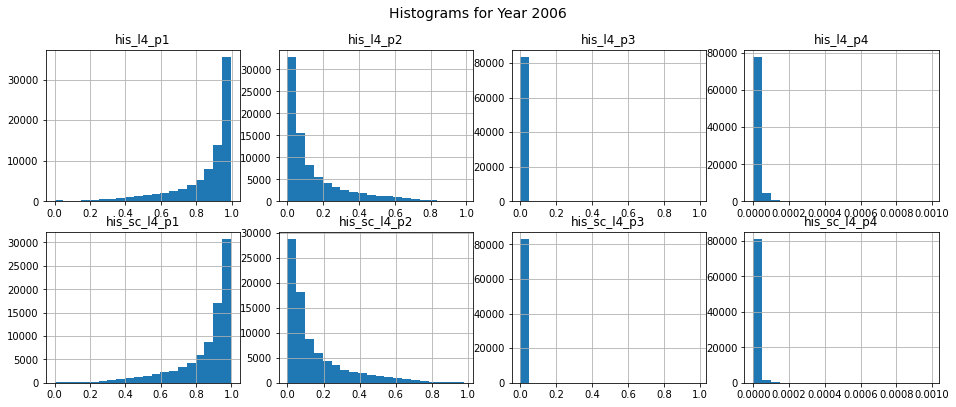

2007


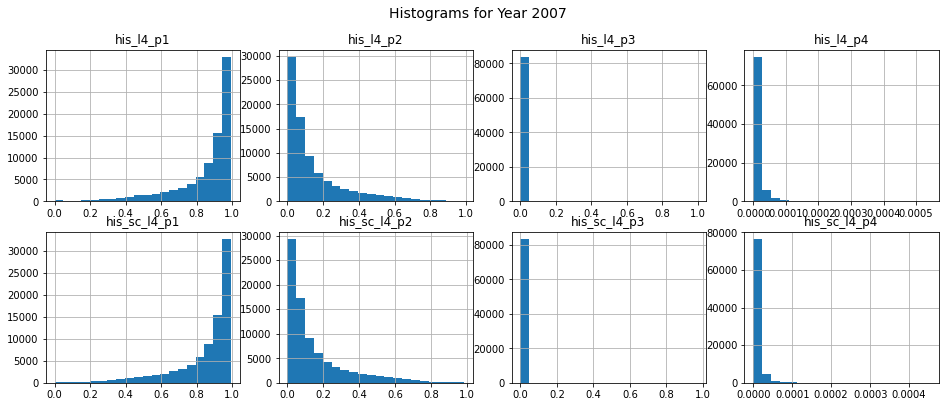

2008


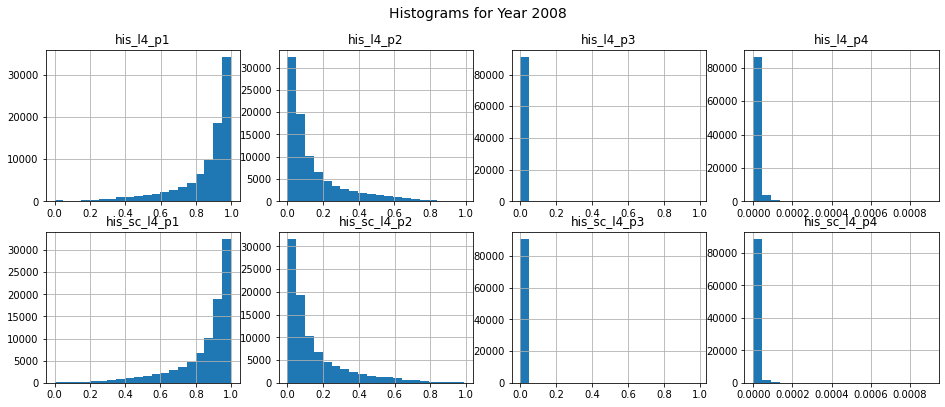

2009


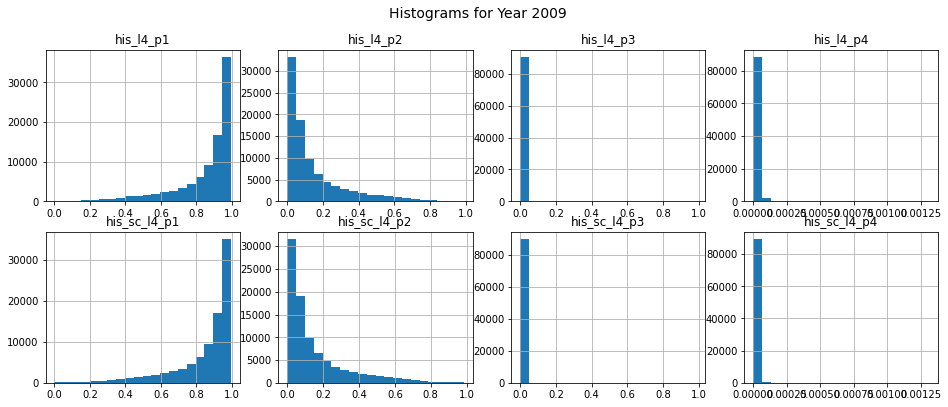

2010


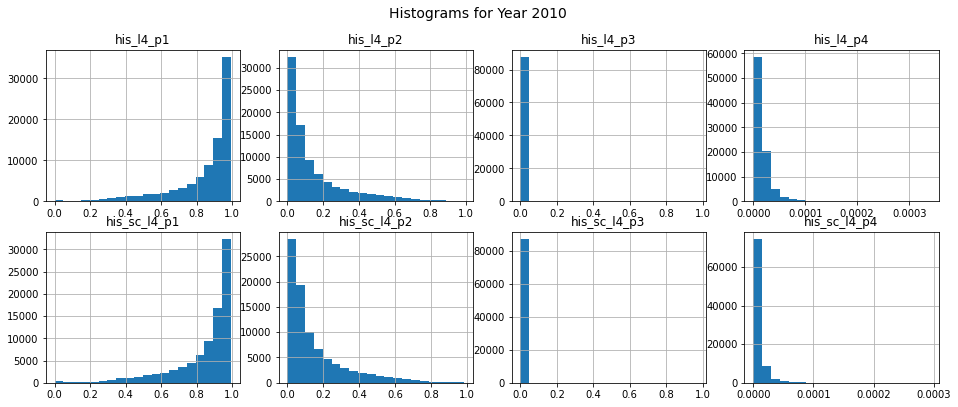

2011


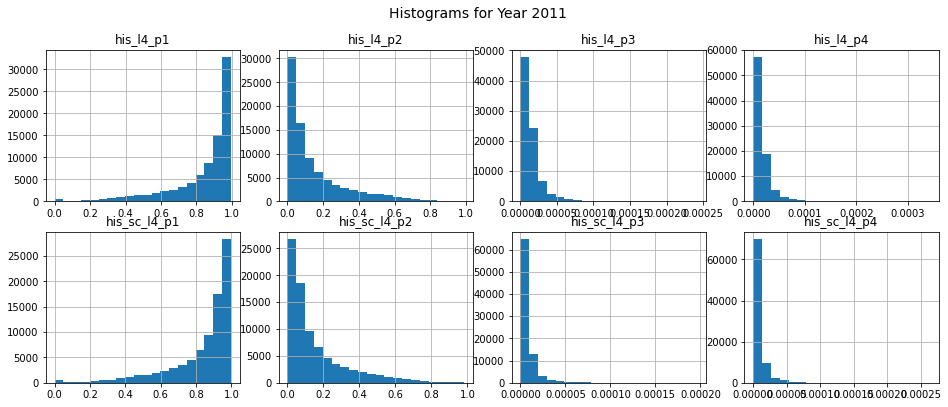

2012


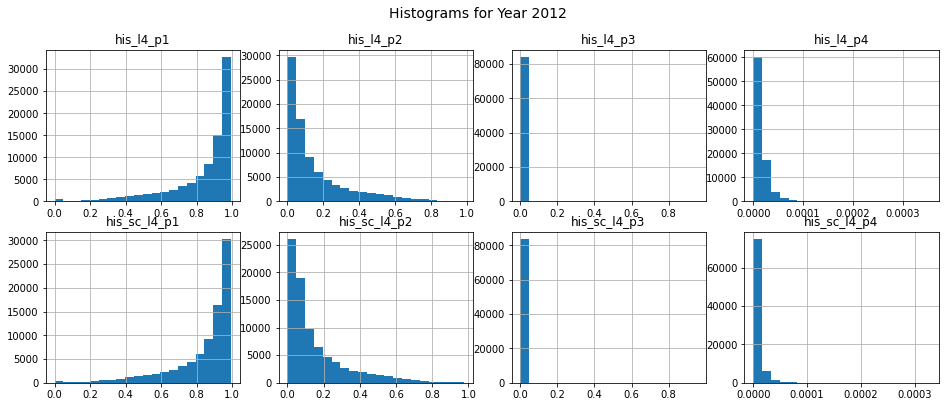

2013


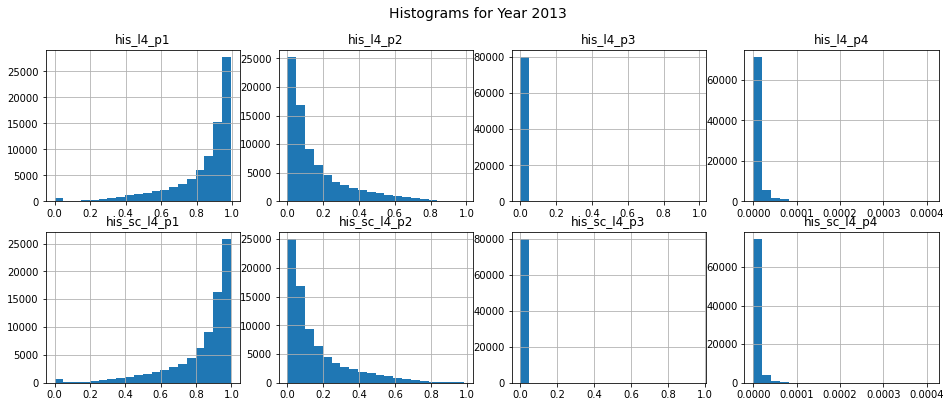

2014


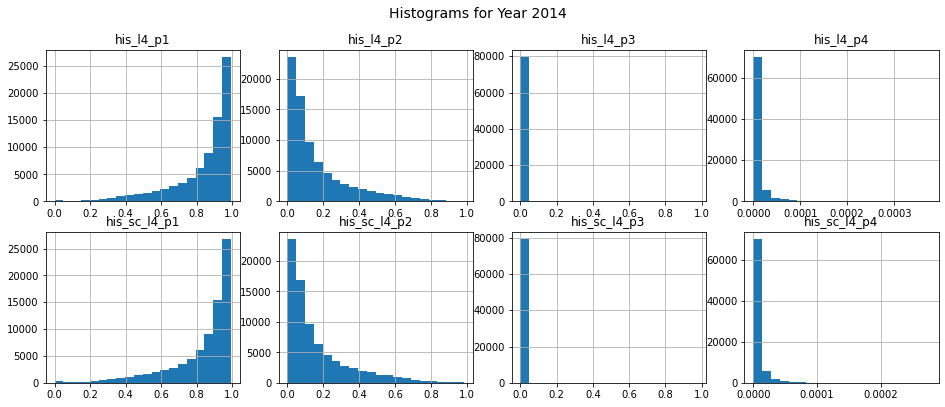

2015


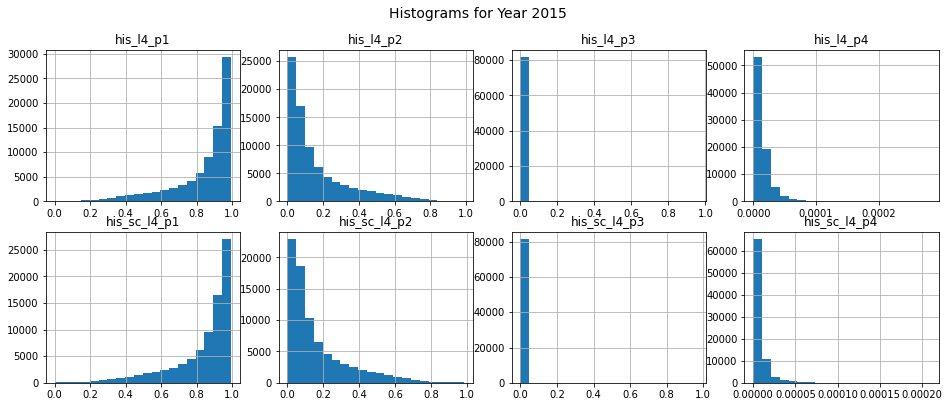

2016


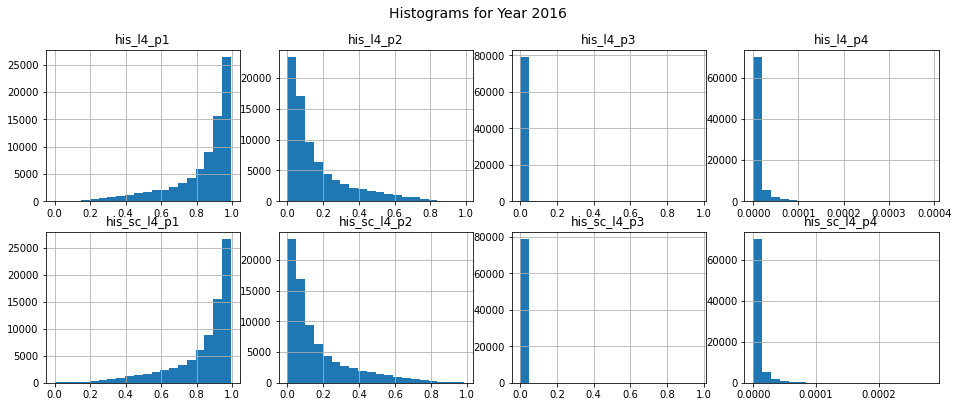

2017


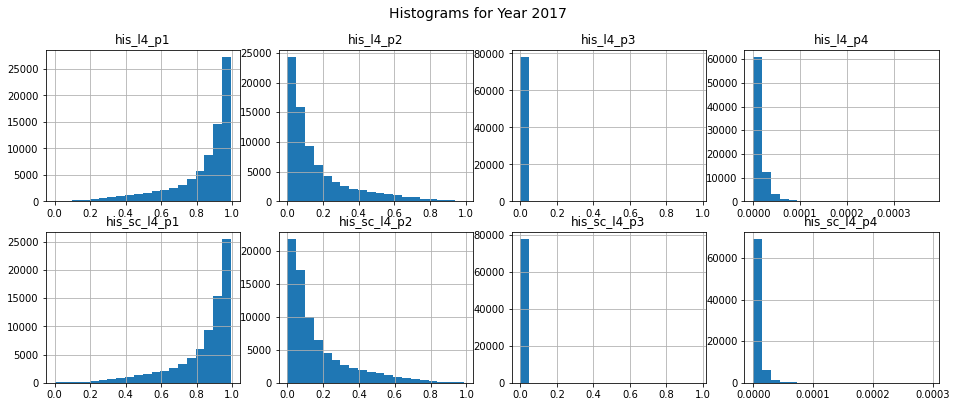

2018


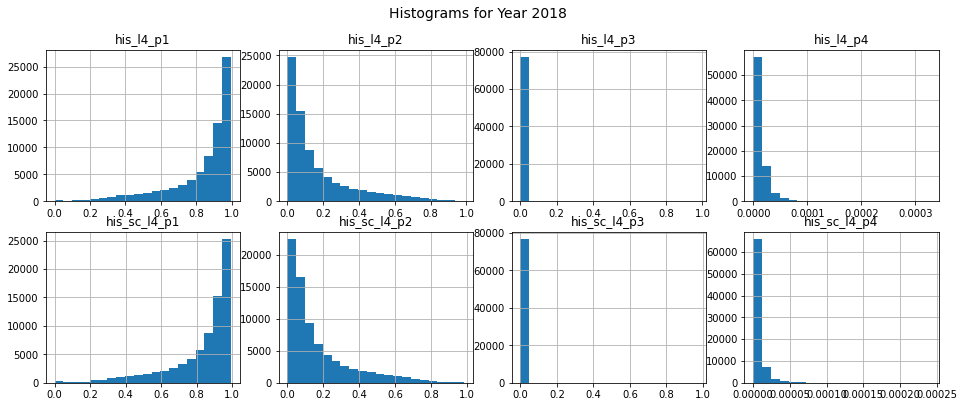

2019


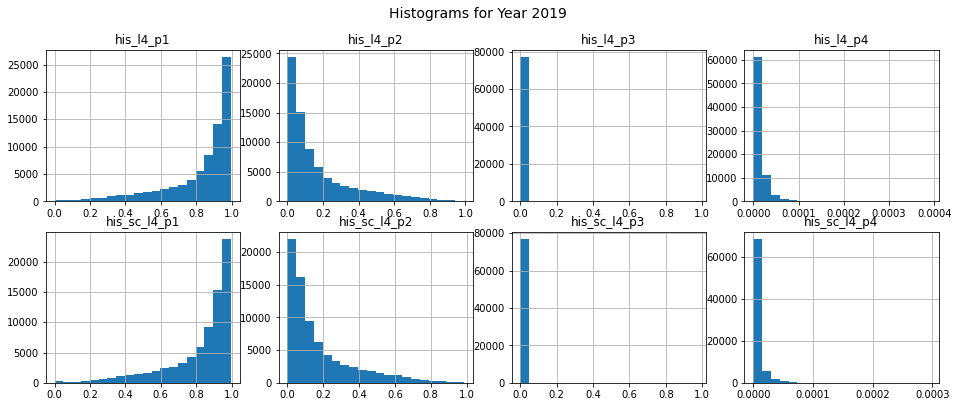

2020


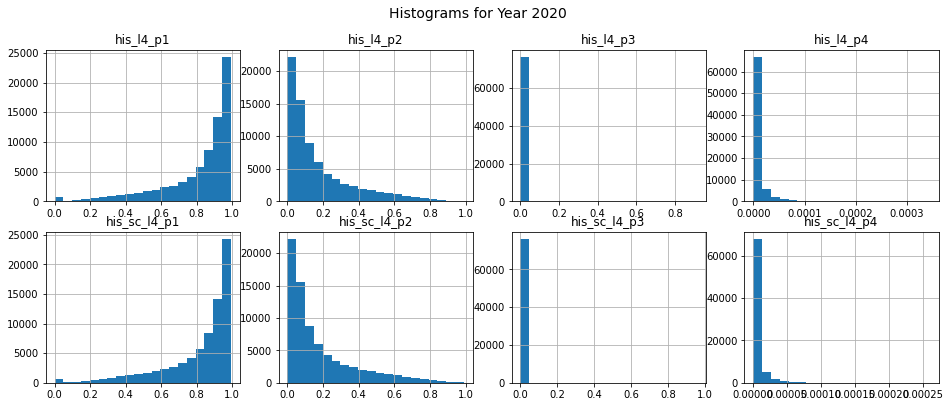

2021


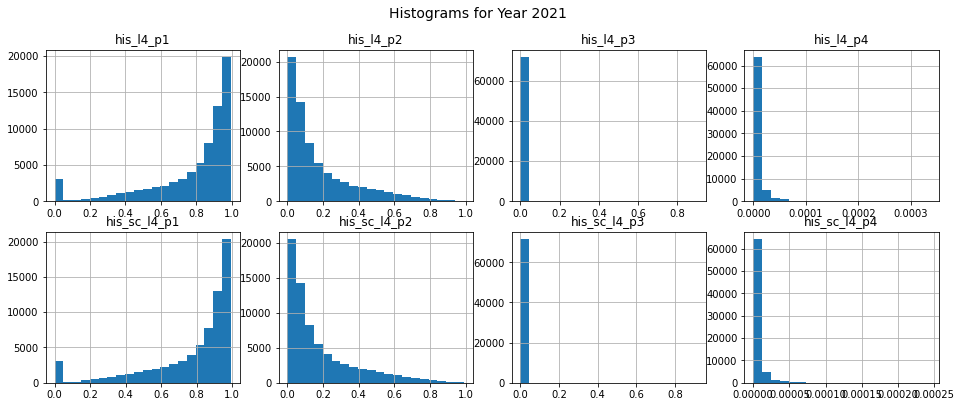

2022


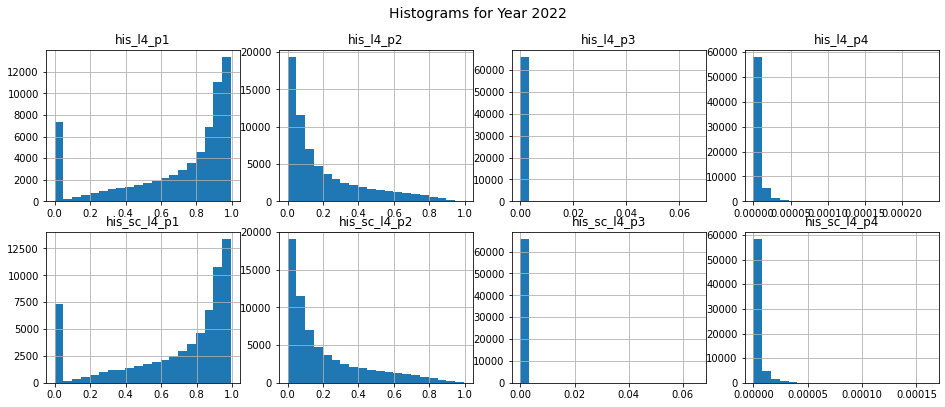

2023


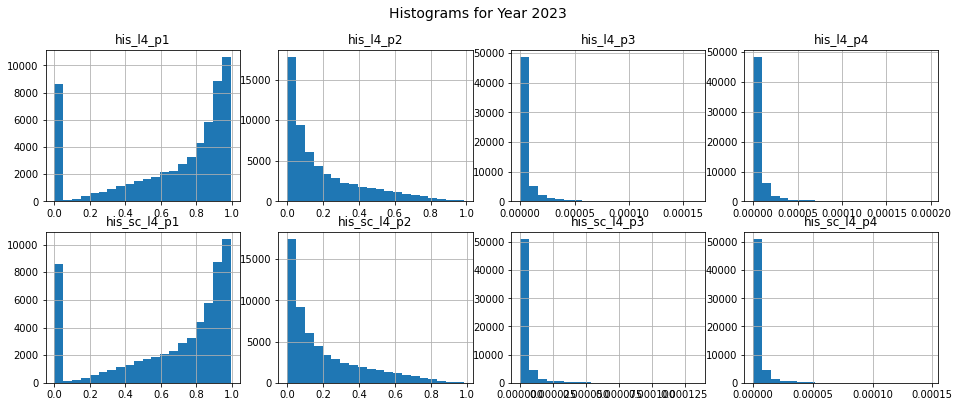

2024


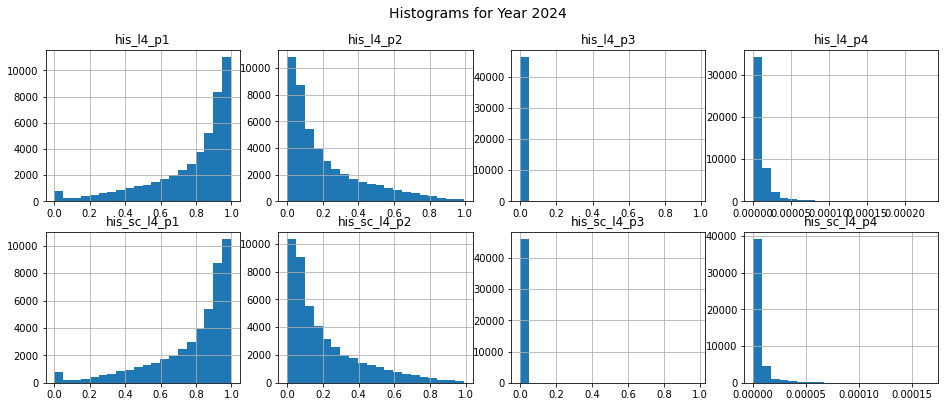

In [7]:
# ヒストグラムの作成 (グラフの行数、列数、解像度を適宜変更)
k_a_util.plot_boxplots(dict_statistics, rows=2, cols=4, dpi=72)



In [8]:
k_a_util.pivot_statistics_by_column2(dict_statistics)

{'his_l4_p1': Year   2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
 0      0.97  0.97  0.01  0.92  0.97  0.97  0.89  0.96  0.97  0.97  0.97  0.98  0.96  0.90  0.95  0.94  0.75  0.97  0.97  0.96  0.98  0.84  0.97  0.35  0.02
 1      0.97  0.97  0.97  0.92  0.96  0.95  0.85  0.82  0.98  0.97  0.98  0.95  0.96  0.94  0.93  0.96  0.83  0.97  0.97  0.91  0.99  0.96  0.92  0.97  0.03
 2      0.97  0.96  0.00  0.94  0.96  0.97  0.96  0.91  0.95  0.72  0.96  0.98  0.86  0.88  0.95  0.92  0.87  0.97  0.97  0.96  0.65  0.96  0.92  0.94  0.21
 3      0.97  0.90  0.22  0.90  0.96  0.98  0.74  0.97  0.95  0.96  0.97  0.87  0.95  0.95  0.97  0.96  0.95  0.94  0.97  0.97  0.98  0.90  0.95  0.89  0.14
 4      0.97  0.89  0.98  0.92  0.96  0.96  0.97  0.94  0.92  0.90  0.97  0.94  0.96  0.96  0.93  0.96  0.84  0.95  0.97  0.38  0.99  0.97  0.96  0.57  0.01
 ...     ...   ...   ...   ...   ...   ...   